In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
from preprocess import Audio_Processor
import matplotlib.pyplot as plt
from data_utils import balanced_supersample, balanced_subsample

Using TensorFlow backend.


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
SR = 16000
blocksize = int(SR/2)
overlap = int(SR/4)

# Setup

In [3]:
path_to_db='../../ESC-50/'
ps = Audio_Processor(path_to_db + 'audio/', sr=SR)
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50
h_classes = ['Human & Animal', 'Interacting Materials']
mapping = {
    'dog': 0,
    'rooster': 0,
    'pig': 0,
    'cow': 0,
    'frog': 0,
    'cat': 0,
    'hen': 0,
    'insects': 0,
    'sheep': 0,
    'crow': 0,
    'rain': 1,
    'sea_waves': 1,
    'crackling_fire': 1,
    'crickets': 0,
    'chirping_birds': 0,
    'water_drops': 1,
    'wind': 1,
    'pouring_water': 1,
    'toilet_flush': 1,
    'thunderstorm': 1,
    'crying_baby': 0,
    'sneezing': 0,
    'clapping': 1,
    'breathing': 0,
    'coughing': 0,
    'footsteps': 1,
    'laughing': 0,
    'brushing_teeth': 1,
    'snoring': 0,
    'drinking_sipping': 1,
    'door_wood_knock': 1,
    'mouse_click': 1,
    'keyboard_typing': 1,
    'door_wood_creaks': 1,
    'can_opening': 1,
    'washing_machine': 1,
    'vacuum_cleaner': 1,
    'clock_alarm': 1,
    'clock_tick': 1,
    'glass_breaking':1,
    'helicopter': 1,
    'chainsaw': 1,
    'siren': 1,
    'car_horn': 1,
    'engine': 1,
    'train': 1,
    'church_bells': 1,
    'airplane': 1,
    'fireworks': 1,
    'hand_saw': 1,
}
dataset['h_target'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    dataset.loc[index, 'h_target'] = mapping[row['category']]

## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [4]:
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap
                       )

In [5]:
df.describe()

,mfcc_2_std,mfcc_2_mean,mfcc_2_noise,mfcc_3_std,mfcc_3_mean,mfcc_3_noise,mfcc_4_std,mfcc_4_mean,mfcc_4_noise,mfcc_5_std,...,sflat_mean,sflat_noise,sroll_std,sroll_mean,sroll_noise,rmse_std,rmse_mean,rmse_noise,h_target,target
count,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,...,3.094700e+04,3.094700e+04,3.094700e+04,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000,30947.000000
mean,73.719667,46.264479,38.909376,33.446607,30.420424,30.067026,29.524960,29.485805,29.035557,28.434550,...,-1.535995e-02,-1.984839e-02,-1.938723e-02,14.260070,25.679845,5.237762,22.727680,4.911355,0.676673,24.927586
std,30.473942,18.374510,17.074185,14.922491,14.885459,15.237449,15.111426,15.600575,15.600374,15.252728,...,2.086369e-01,2.085811e-01,2.070859e-01,22.763022,35.058448,15.400834,17.316189,3.410737,0.467754,14.392002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.723873e-01,-7.458212e-01,-7.421038e-01,3.736712,6.454405,1.436722,0.000000,0.510542,0.000000,0.000000
25%,54.270596,34.628251,27.134954,22.152604,17.779317,16.509955,16.142753,15.170072,14.981445,14.189170,...,-1.610912e-01,-1.659554e-01,-1.654091e-01,9.477854,17.833900,3.478282,14.893102,2.640077,0.000000,12.000000
50%,74.850493,46.716638,38.133677,33.581847,30.752174,30.586093,30.338455,30.395567,30.146264,29.760050,...,-4.367921e-09,-5.277997e-09,-8.137921e-09,11.984384,21.852503,4.507795,18.785621,4.292363,1.000000,25.000000
75%,93.894152,58.166543,50.129512,44.366403,41.731754,42.094875,41.359002,41.674235,40.984961,40.346104,...,1.205989e-01,1.163689e-01,1.146088e-01,15.742905,27.626522,5.601991,25.275695,6.459832,1.000000,38.000000
max,208.957500,123.849951,118.728586,92.085252,89.965195,89.935857,113.100970,118.224343,120.085079,113.077150,...,8.057657e-01,8.572066e-01,7.961318e-01,2206.362673,5031.091987,2444.047253,620.895529,156.366775,1.000000,49.000000


In [6]:
X = df.drop(['target','h_target'], axis=1)
y = df['target']
yy = df['h_target']

In [7]:
X, yy = balanced_subsample(X, yy)

# Training
### No Reduction

In [8]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

components = list(range(5,129))

clf = make_pipeline(
    MinMaxScaler(),
    SVC(probability=True, max_iter=10000)
)

In [9]:
scores = cross_validate(clf, 
                        X, yy, 
                        cv=5, 
                        scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
                        n_jobs=5
                       )

In [10]:
default_stats = pd.DataFrame(scores)
default_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarni

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc,train_accuracy,train_f1,train_precision,train_recall,train_roc_auc
0,281.682517,46.834159,0.601648,0.599347,0.602830,0.595904,0.651087,0.625750,0.620462,0.629354,0.611819,0.675767
1,273.520171,40.129122,0.643428,0.632122,0.652822,0.612694,0.685663,0.628107,0.627409,0.628589,0.626234,0.677486
2,290.074479,47.012586,0.596202,0.603727,0.592682,0.615192,0.639396,0.622986,0.615345,0.628073,0.603123,0.677787
3,335.720415,52.067996,0.617441,0.618870,0.616567,0.621189,0.663389,0.624360,0.618981,0.627973,0.610244,0.674102
4,275.085119,40.719429,0.625687,0.614910,0.633139,0.597701,0.685752,0.626359,0.619272,0.631244,0.607745,0.674115


In [67]:
default_stats_red = default_stats.mean()
default_stats_red

fit_time           291.216540
score_time          45.352658
test_accuracy        0.616881
test_f1              0.613795
test_precision       0.619608
test_recall          0.608536
test_roc_auc         0.665057
train_accuracy       0.625512
train_f1             0.620294
train_precision      0.629047
train_recall         0.611833
train_roc_auc        0.675851
dtype: float64

In [51]:
default_stats_red = pd.Series(default_stats_red[
    ['fit_time',
     'test_roc_auc', 
     'test_accuracy', 
     'test_recall', 
     'test_precision']
])
default_stats_red.columns = ['mean_fit_time', 'mean_test_roc_auc', 'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']
default_stats_red

fit_time          291.216540
test_roc_auc        0.665057
test_accuracy       0.616881
test_recall         0.608536
test_precision      0.619608
dtype: float64

### PCA

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feat', PCA(n_components=None)),
    ('classify', SVC(probability=True, max_iter=10000))
])

params = {
    'feat__n_components': range(25, 100, 25)
}

gridsrc = GridSearchCV(clf, 
                        cv=5, 
                        param_grid=params,
                        scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
                        verbose=2,
                        n_jobs=5,
                        refit=False
                       )
gridsrc.fit(X,yy)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feat', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'feat__n_components': range(25, 100, 25)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
       verbose=2)

In [13]:
pca_stats = pd.DataFrame(gridsrc.cv_results_)
pca_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,83.655381,12.647235,0.604387,0.615820,0.598833,0.633920,0.646698,0.614994,0.623478,0.610081,...,0.015153,0.011767,0.016031,0.008653,0.016474,0.003445,0.006050,0.004583,0.014336,0.003724
1,112.294402,19.418971,0.627224,0.623107,0.630453,0.616230,0.676703,0.639616,0.632681,0.645129,...,0.010583,0.007703,0.013937,0.010711,0.011925,0.002264,0.004148,0.003839,0.009798,0.001937
2,150.044849,24.804808,0.626774,0.626103,0.627686,0.624825,0.677254,0.638942,0.635447,0.641677,...,0.013081,0.009715,0.016094,0.010720,0.013965,0.002297,0.003760,0.003309,0.008430,0.001296


In [14]:
for col in pca_stats.columns:
    print(col)

mean_fit_time
mean_score_time
mean_test_accuracy
mean_test_f1
mean_test_precision
mean_test_recall
mean_test_roc_auc
mean_train_accuracy
mean_train_f1
mean_train_precision
mean_train_recall
mean_train_roc_auc
param_feat__n_components
params
rank_test_accuracy
rank_test_f1
rank_test_precision
rank_test_recall
rank_test_roc_auc
split0_test_accuracy
split0_test_f1
split0_test_precision
split0_test_recall
split0_test_roc_auc
split0_train_accuracy
split0_train_f1
split0_train_precision
split0_train_recall
split0_train_roc_auc
split1_test_accuracy
split1_test_f1
split1_test_precision
split1_test_recall
split1_test_roc_auc
split1_train_accuracy
split1_train_f1
split1_train_precision
split1_train_recall
split1_train_roc_auc
split2_test_accuracy
split2_test_f1
split2_test_precision
split2_test_recall
split2_test_roc_auc
split2_train_accuracy
split2_train_f1
split2_train_precision
split2_train_recall
split2_train_roc_auc
split3_test_accuracy
split3_test_f1
split3_test_precision
split3_test_recal

In [35]:
pca_stats_red = pca_stats[
    ['param_feat__n_components', 
     'mean_fit_time',
     'mean_test_roc_auc', 
     'mean_test_accuracy', 
     'mean_test_recall', 
     'mean_test_precision']
]

pca_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)

,param_feat__n_components,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
2,75,150.044849,0.677254,0.626774,0.624825,0.627686
1,50,112.294402,0.676703,0.627224,0.616230,0.630453
0,25,83.655381,0.646698,0.604387,0.633920,0.598833


### Kernel PCA

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feat', KernelPCA(n_components=None, n_jobs=5)),
    ('classify', SVC(probability=True, max_iter=10000))
])

params = {
    'feat__n_components': range(25, 100, 25),
    'feat__kernel': ['poly', 'rbf', 'sigmoid', 'cosine']
}

gridsrc = GridSearchCV(
                clf,
                scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], 
                cv=5,
                refit=False,
                param_grid = params,
                verbose=2,
                n_jobs=5
)

gridsrc.fit(X,yy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 101.8min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed: 202.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feat', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=5,
     random_state=N..., max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'feat__kernel': ['poly', 'rbf', 'sigmoid', 'cosine'], 'feat__n_components': range(25, 100, 25)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
       verbose=2)

In [17]:
kpca_stats = pd.DataFrame(gridsrc.cv_results_)
kpca_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,619.595322,27.696823,0.580652,0.582894,0.580925,0.585649,0.607082,0.581589,0.583276,0.580975,...,0.020805,0.013528,0.024267,0.015047,0.024493,0.004237,0.002933,0.004859,0.003166,0.005026
1,641.505239,36.921804,0.580152,0.584168,0.579861,0.589346,0.603018,0.579990,0.583467,0.578715,...,0.021156,0.012759,0.024644,0.013366,0.024777,0.004499,0.003338,0.004988,0.003380,0.005214
2,597.600831,44.712577,0.577503,0.584506,0.575944,0.593944,0.598347,0.578141,0.584399,0.575910,...,0.020421,0.013121,0.022791,0.012720,0.025033,0.004652,0.002624,0.005245,0.000638,0.005351
3,618.543224,64.303539,0.575805,0.584118,0.574037,0.595343,0.597758,0.576792,0.584547,0.574063,...,0.020936,0.012413,0.023662,0.013180,0.024868,0.004136,0.002779,0.004523,0.002447,0.005547
4,753.098903,71.975377,0.574006,0.587875,0.570353,0.607236,0.595435,0.575118,0.588160,0.570692,...,0.020653,0.012511,0.022479,0.013487,0.024977,0.004530,0.002564,0.004930,0.001826,0.005498


In [34]:
kpca_stats_red = kpca_stats[
    ['param_feat__n_components',
     'param_feat__kernel',
     'mean_fit_time',
     'mean_test_roc_auc', 
     'mean_test_accuracy', 
     'mean_test_recall', 
     'mean_test_precision']
]

kpca_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)

,param_feat__n_components,param_feat__kernel,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
9,25,cosine,739.063274,0.612045,0.578803,0.604237,0.576057
10,50,cosine,828.904075,0.608082,0.576554,0.606636,0.573270
0,25,poly,619.595322,0.607082,0.580652,0.585649,0.580925
1,50,poly,641.505239,0.603018,0.580152,0.589346,0.579861
11,75,cosine,895.126515,0.602535,0.574006,0.611933,0.569704
2,75,poly,597.600831,0.598347,0.577503,0.593944,0.575944
3,25,rbf,618.543224,0.597758,0.575805,0.595343,0.574037
4,50,rbf,753.098903,0.595435,0.574006,0.607236,0.570353
5,75,rbf,863.327263,0.593739,0.579602,0.568859,0.583291
8,75,sigmoid,836.314673,0.593566,0.582600,0.547571,0.589705


### LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feat', LinearDiscriminantAnalysis(n_components=None)),
    ('classify', SVC(probability=True, max_iter=10000))
])

params = {
    'feat__n_components': range(25, 100, 25),
    'feat__solver': ['svd', 'eigen']
}

gridsrc = GridSearchCV(
                clf,
                scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], 
                cv=5,
                refit=False,
                param_grid = params,
                verbose=2,
                n_jobs=5
)

gridsrc.fit(X,yy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feat', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('classify', SVC(C=1.0, cache_size=200, class_w... max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'feat__n_components': range(25, 100, 25), 'feat__solver': ['svd', 'eigen']},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
       verbose=2)

In [20]:
lda_stats = pd.DataFrame(gridsrc.cv_results_)
lda_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,43.015051,6.605457,0.643914,0.641555,0.645920,0.637418,0.680388,0.658417,0.653584,0.663029,...,0.007122,0.007496,0.008462,0.012109,0.002385,0.001808,0.004060,0.004755,0.011367,0.003197
1,46.273077,7.137635,0.644763,0.646123,0.643672,0.648611,0.694582,0.658105,0.657164,0.658974,...,0.007961,0.007872,0.008036,0.008446,0.006551,0.001785,0.003769,0.002006,0.008328,0.000431
2,45.627933,6.384449,0.643914,0.641555,0.645920,0.637418,0.680388,0.658417,0.653584,0.663029,...,0.007122,0.007496,0.008462,0.012109,0.002385,0.001808,0.004060,0.004755,0.011367,0.003197
3,50.375954,7.224759,0.644763,0.646123,0.643672,0.648611,0.694582,0.658105,0.657164,0.658974,...,0.007961,0.007872,0.008036,0.008446,0.006551,0.001785,0.003769,0.002006,0.008328,0.000431
4,44.827396,6.000429,0.643914,0.641555,0.645920,0.637418,0.680388,0.658417,0.653584,0.663029,...,0.007122,0.007496,0.008462,0.012109,0.002385,0.001808,0.004060,0.004755,0.011367,0.003197


In [33]:
lda_stats_red = lda_stats[
    ['param_feat__n_components',
     'param_feat__solver',
     'mean_fit_time',
     'mean_test_roc_auc', 
     'mean_test_accuracy', 
     'mean_test_recall', 
     'mean_test_precision']
]

lda_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)

,param_feat__n_components,param_feat__solver,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
1,25,eigen,46.273077,0.694582,0.644763,0.648611,0.643672
3,50,eigen,50.375954,0.694582,0.644763,0.648611,0.643672
5,75,eigen,44.913033,0.694582,0.644763,0.648611,0.643672
0,25,svd,43.015051,0.680388,0.643914,0.637418,0.645920
2,50,svd,45.627933,0.680388,0.643914,0.637418,0.645920
4,75,svd,44.827396,0.680388,0.643914,0.637418,0.645920


### K Select

In [22]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feat', SelectKBest(k=None)),
    ('classify', SVC(probability=True, max_iter=10000))
])

params = {
    'feat__k': range(25, 125, 25),
    'feat__score_func': [chi2, mutual_info_classif, f_classif]
}

gridsrc = GridSearchCV(
                clf,
                scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], 
                cv=5,
                refit=False,
                param_grid = params,
                verbose=2,
                n_jobs=5
)

gridsrc.fit(X,yy)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 21.1min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed: 52.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feat', SelectKBest(k=None, score_func=<function f_classif at 0x7fca4dcc7a60>)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'feat__score_func': [<function chi2 at 0x7fca4dcc7b70>, <function mutual_info_classif at 0x7fca4d7ed950>, <function f_classif at 0x7fca4dcc7a60>], 'feat__k': range(25, 125, 25)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
       verbose=2)

In [23]:
kbest_stats = pd.DataFrame(gridsrc.cv_results_)
kbest_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,85.393754,12.443814,0.590546,0.579461,0.596575,0.563962,0.628939,0.596355,0.583015,0.602958,...,0.019281,0.014483,0.024063,0.016325,0.022738,0.003608,0.008638,0.004346,0.017214,0.004250
1,98.924781,12.386046,0.602838,0.605154,0.601936,0.608835,0.641839,0.610022,0.611352,0.609228,...,0.013760,0.013239,0.015498,0.019415,0.017402,0.006590,0.010047,0.006214,0.017630,0.008520
2,86.226459,12.421222,0.589246,0.584030,0.591883,0.576754,0.629568,0.598941,0.590078,0.603384,...,0.018134,0.017163,0.019938,0.020600,0.023084,0.003213,0.011194,0.003203,0.023295,0.003061
3,111.794332,18.696415,0.628523,0.630692,0.627358,0.634319,0.676529,0.637930,0.636972,0.638680,...,0.010420,0.007584,0.012951,0.010194,0.009988,0.001636,0.004123,0.002913,0.010131,0.000738
4,128.079404,19.111710,0.612982,0.614112,0.612754,0.615930,0.656268,0.618279,0.617050,0.618973,...,0.012059,0.009688,0.014782,0.015680,0.016803,0.006251,0.010364,0.005587,0.018639,0.008623


In [32]:
kbest_stats_red = kbest_stats[
    ['param_feat__k',
     'param_feat__score_func',
     'mean_fit_time',
     'mean_test_roc_auc', 
     'mean_test_accuracy', 
     'mean_test_recall', 
     'mean_test_precision']
]

kbest_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)

,param_feat__k,param_feat__score_func,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
3,50,<function chi2 at 0x7fca4dcc7b70>,111.794332,0.676529,0.628523,0.634319,0.627358
6,75,<function chi2 at 0x7fca4dcc7b70>,149.449979,0.672380,0.624875,0.626124,0.624947
8,75,<function f_classif at 0x7fca4dcc7a60>,151.731154,0.670860,0.624925,0.627923,0.624546
9,100,<function chi2 at 0x7fca4dcc7b70>,210.641218,0.669232,0.620927,0.616230,0.622608
5,50,<function f_classif at 0x7fca4dcc7a60>,112.421140,0.668148,0.622077,0.630222,0.620289
11,100,<function f_classif at 0x7fca4dcc7a60>,196.531623,0.667758,0.620328,0.619928,0.621112
7,75,<function mutual_info_classif at 0x7fca4d7ed950>,167.731177,0.661701,0.615431,0.617130,0.615493
10,100,<function mutual_info_classif at 0x7fca4d7ed950>,211.974515,0.658856,0.614032,0.611933,0.615028
4,50,<function mutual_info_classif at 0x7fca4d7ed950>,128.079404,0.656268,0.612982,0.615930,0.612754
1,25,<function mutual_info_classif at 0x7fca4d7ed950>,98.924781,0.641839,0.602838,0.608835,0.601936


### Combination

In [25]:
clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feat_sel', SelectKBest(k=50)),
    ('feat_red', LinearDiscriminantAnalysis(n_components=None)),
    ('classify', SVC(probability=True, max_iter=10000))
])

params = {
    'feat_sel__k': range(50, 100, 10),
    'feat_sel__score_func': [chi2],
    'feat_red__n_components': range(10, 25, 5),
    'feat_red__solver': ['eigen']
}

gridsrc = GridSearchCV(
                clf,
                scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], 
                cv=5,
                refit=False,
                param_grid = params,
                verbose=2,
                n_jobs=5
)

gridsrc.fit(X,yy)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  8.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed: 18.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feat_sel', SelectKBest(k=50, score_func=<function f_classif at 0x7fca4dcc7a60>)), ('feat_red', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001..., max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'feat_red__solver': ['eigen'], 'feat_sel__k': range(50, 100, 10), 'feat_sel__score_func': [<function chi2 at 0x7fca4dcc7b70>], 'feat_red__n_components': range(10, 25, 5)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
       verbose=2)

In [26]:
comb_stats = pd.DataFrame(gridsrc.cv_results_)
comb_stats.head()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,45.924432,5.832423,0.644663,0.645969,0.643682,0.648311,0.690861,0.649910,0.650085,0.649843,...,0.005723,0.004303,0.006920,0.003657,0.004903,0.002558,0.001521,0.005093,0.006925,0.001582
1,45.541990,5.884764,0.643914,0.643432,0.644453,0.642614,0.690633,0.652621,0.650394,0.654598,...,0.005192,0.004530,0.007872,0.010342,0.004717,0.000855,0.002374,0.001854,0.006054,0.000845
2,45.404535,5.518799,0.644363,0.644390,0.644463,0.644413,0.690758,0.654857,0.652826,0.656693,...,0.005500,0.003766,0.007468,0.005846,0.005489,0.000787,0.002213,0.001349,0.005337,0.001167
3,45.367818,5.543276,0.645213,0.643931,0.646332,0.641715,0.691473,0.655457,0.652525,0.658128,...,0.003643,0.004753,0.005508,0.011014,0.005420,0.001179,0.002008,0.001550,0.004372,0.001444
4,45.000950,5.522272,0.644963,0.644039,0.645756,0.642415,0.692817,0.655469,0.652258,0.658386,...,0.004872,0.005251,0.005789,0.008738,0.005566,0.001547,0.003307,0.001367,0.006912,0.001543


In [27]:
comb_stats.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_accuracy',
       'mean_test_f1', 'mean_test_precision', 'mean_test_recall',
       'mean_test_roc_auc', 'mean_train_accuracy', 'mean_train_f1',
       'mean_train_precision', 'mean_train_recall', 'mean_train_roc_auc',
       'param_feat_red__n_components', 'param_feat_red__solver',
       'param_feat_sel__k', 'param_feat_sel__score_func', 'params',
       'rank_test_accuracy', 'rank_test_f1', 'rank_test_precision',
       'rank_test_recall', 'rank_test_roc_auc', 'split0_test_accuracy',
       'split0_test_f1', 'split0_test_precision', 'split0_test_recall',
       'split0_test_roc_auc', 'split0_train_accuracy', 'split0_train_f1',
       'split0_train_precision', 'split0_train_recall', 'split0_train_roc_auc',
       'split1_test_accuracy', 'split1_test_f1', 'split1_test_precision',
       'split1_test_recall', 'split1_test_roc_auc', 'split1_train_accuracy',
       'split1_train_f1', 'split1_train_precision', 'split1_train_recall',
  

In [31]:
comb_stats_red = comb_stats[
    ['param_feat_sel__k',
     'param_feat_sel__score_func',
     'param_feat_red__n_components',
     'param_feat_red__solver',
     'mean_fit_time',
     'mean_test_roc_auc', 
     'mean_test_accuracy', 
     'mean_test_recall', 
     'mean_test_precision']
]

comb_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)

,param_feat_sel__k,param_feat_sel__score_func,param_feat_red__n_components,param_feat_red__solver,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
4,90,<function chi2 at 0x7fca4dcc7b70>,10,eigen,45.000950,0.692817,0.644963,0.642415,0.645756
9,90,<function chi2 at 0x7fca4dcc7b70>,15,eigen,44.782609,0.692817,0.644963,0.642415,0.645756
14,90,<function chi2 at 0x7fca4dcc7b70>,20,eigen,45.598498,0.692817,0.644963,0.642415,0.645756
3,80,<function chi2 at 0x7fca4dcc7b70>,10,eigen,45.367818,0.691473,0.645213,0.641715,0.646332
8,80,<function chi2 at 0x7fca4dcc7b70>,15,eigen,45.282259,0.691473,0.645213,0.641715,0.646332
13,80,<function chi2 at 0x7fca4dcc7b70>,20,eigen,45.262764,0.691473,0.645213,0.641715,0.646332
0,50,<function chi2 at 0x7fca4dcc7b70>,10,eigen,45.924432,0.690861,0.644663,0.648311,0.643682
5,50,<function chi2 at 0x7fca4dcc7b70>,15,eigen,45.715398,0.690861,0.644663,0.648311,0.643682
10,50,<function chi2 at 0x7fca4dcc7b70>,20,eigen,45.117728,0.690861,0.644663,0.648311,0.643682
2,70,<function chi2 at 0x7fca4dcc7b70>,10,eigen,45.404535,0.690758,0.644363,0.644413,0.644463


In [68]:
default_stats_red['kind'] = 'None'
default_stats_red['mean_test_roc_auc'] = default_stats_red['test_roc_auc']
default_stats_red['mean_test_accuracy'] = default_stats_red['test_accuracy']
default_stats_red['mean_test_recall'] = default_stats_red['test_recall']
default_stats_red['mean_test_precision'] = default_stats_red['test_precision']

pca=pca_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)
pca['kind'] = 'PCA'
kpca=kpca_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)
kpca['kind'] = 'KPCA'
lda=lda_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)
lda['kind'] = 'LDA'
kbest=kbest_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)
kbest['kind'] = 'KBest'
comb = comb_stats_red.sort_values(
             ['mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision'],
             ascending=False)
comb['kind'] = 'combination'

In [69]:
comparative = pd.DataFrame([default_stats_red, pca.iloc[0], kpca.iloc[0], lda.iloc[0], kbest.iloc[0]])

In [70]:
comparative = comparative[['kind','mean_test_roc_auc', 
              'mean_test_accuracy', 
              'mean_test_recall', 
              'mean_test_precision']]
comparative

,kind,mean_test_roc_auc,mean_test_accuracy,mean_test_recall,mean_test_precision
Unnamed 0,None,0.665057,0.616881,0.608536,0.619608
2,PCA,0.677254,0.626774,0.624825,0.627686
9,KPCA,0.612045,0.578803,0.604237,0.576057
1,LDA,0.694582,0.644763,0.648611,0.643672
3,KBest,0.676529,0.628523,0.634319,0.627358


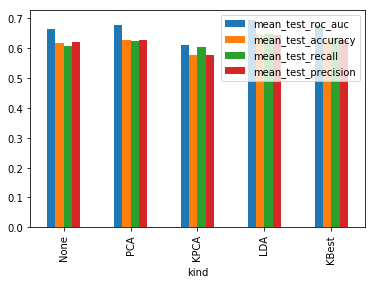

In [71]:
comparative.plot(x='kind',kind='bar')